<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

#  <p style="text-align: center;"><span style="color:#2c061f"> Class 4, Problem Set 1 </span></p>

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import optimize

<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

## <p style="text-align: center;"> Plan for today </p>
<br>

1. Brush up on important concepts/syntax
    * Creating functions
    * Figure syntax
    * SciPy.optimize
2. Work on PS1

<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

## <p style="text-align: center;"> Functions</p>

<br>

**Never do something twice**: This is where functions come in handy (and for a lot of other reasons)

`def name_of_function(input):
    **do something with the input**
    return output               `


In [5]:
# Example
def f(x):
    fx = np.sin(x)+0.05*x**2 
    return fx

print(f(6))

1.5205845018010742


<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

## <p style="text-align: center;"> Functions: Best practice</p>

In [7]:
def f(
    x:float
    ) -> float:
    
    '''Calculate a function value given input
    Args:
        x (float): Input
    Returns:
        float: Function value
    '''
    
    fx = np.sin(x)+0.05*x**2 
    
    return fx

In [10]:
for i in range(1,6):
    print(f'The function value at {i} is: {f(i)}')

The function value at 1 is: 0.8914709848078965
The function value at 2 is: 1.1092974268256817
The function value at 3 is: 0.5911200080598672
The function value at 4 is: 0.04319750469207184
The function value at 5 is: 0.29107572533686155


<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

## <p style="text-align: center;"> Figure syntax</p>

<br>
Probably different from what you know (SAS, Stata etc.)

... get used to it...

NameError: name 'f' is not defined

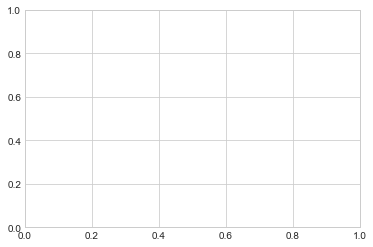

In [2]:
x = np.linspace(-10,10,num=100)

# Initialize canvas - From documentation: "Unique identifier for the figure"
fig1 = plt.figure() # Now fig1 object is a Matplot figure

# From documentation: add_subplot(nrows, ncols, index, **kwargs)
ax1 = fig1.add_subplot(1,1,1)

# Choose method: .plot(), .hist(), .plot_surface() etc.
ax1.plot(x, f(x))

# Customize
ax1.set_title('Awesome plot'); #; suppress print

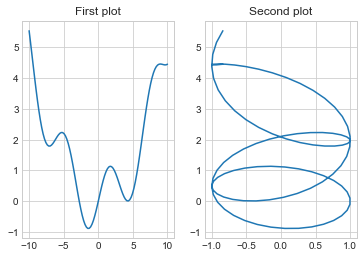

In [5]:
fig2 = plt.figure()

ax2_1 = fig2.add_subplot(1,2,1)
ax2_1.plot(x, f(x))
ax2_1.set_title('First plot')

ax2_2 = fig2.add_subplot(1,2,2)
ax2_2.plot(np.cos(x), (f(x)))
ax2_2.set_title('Second plot');

<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

## <p style="text-align: center;"> SciPy.optimize</p>

* Module for optimizing - more precise than 'just' looping through combinations
* One problem can be solved in different ways - don't let it knock you out
* Remember that we minimize! So if your maximizing your objective should be negative

In [9]:
# Initial guess
x_guess = 0

# Objective function: 
objective_function = lambda x: f(x)

list_of_bounds = [(np.min(x),np.max(x)), (np.min(x),0), (0,np.max(x))]

# SciPy
for b in list_of_bounds:
    opt = optimize.minimize_scalar(objective_function
                                     , x_guess
                                     , method='bounded'
                                     , bounds=b
                                  )

    # Unpack results
    x_best_scipy = opt.x  
    f_best_scipy = opt.fun
    # Print
    print('minimum', f_best_scipy)
    print(f'Minimum function value is {f_best_scipy:.2f} at x = {x_best_scipy:.8f}')

minimum -0.887862826573322
Minimum function value is -0.89 at x = -1.42755262
minimum -0.8878628265736219
Minimum function value is -0.89 at x = -1.42755138
minimum 0.007912876341589659
Minimum function value is 0.01 at x = 4.27109533
